Individual Project Nº1

Section 1: ETL process.
Import given datasets and start a data cleaning process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
# import file
filename = "output_steam_games.json"
filepath = "./Datasets/"
output_steam_games = pd.read_json(filepath + filename, orient = "columns", lines = True)

In [3]:
# taking a look into the raw data
output_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


Dealing with NaNs

In [4]:
# there seems to be lots of NaNs, even with that quick look. There are rows with NaNs in all of its columns
# Lets drop those
output_steam_games = output_steam_games.dropna(axis = 0, how = 'all')
# lets see where are the rest of them
output_steam_games.isna().sum()

publisher       8052
genres          3283
app_name           2
title           2050
url                0
release_date    2067
tags             163
reviews_url        2
specs            670
price           1377
early_access       0
id                 2
developer       3299
dtype: int64

In [5]:
# there are 2049 rows with missing titles but only 1 with missing app_name. Lets imput missing tittles with app_name
output_steam_games.loc[output_steam_games['title'].isna(), 'title'] = output_steam_games.loc[output_steam_games['title'].isna(), 'app_name']

# there are 8052 rows with missing publisher and 3299 with missing developers, since developers could be also the publisher let cross impute NaN of one of them with the value of the other one
output_steam_games.loc[output_steam_games['publisher'].isna(), 'publisher'] = output_steam_games.loc[output_steam_games['publisher'].isna(), 'developer']
output_steam_games.loc[output_steam_games['developer'].isna(), 'developer'] = output_steam_games.loc[output_steam_games['developer'].isna(), 'publisher']
output_steam_games.isna().sum()

publisher       3234
genres          3283
app_name           2
title              2
url                0
release_date    2067
tags             163
reviews_url        2
specs            670
price           1377
early_access       0
id                 2
developer       3234
dtype: int64

In [6]:
# lets see what is the deal with those NaNs in 'id' column
output_steam_games[output_steam_games.id.isna()]

# where we can see that the first one (88384) has all columns but one (a generic url) NaNs
# while the second one (119271) only has NaN in 'id'

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88384,None,None,None,None,http://store.steampowered.com/,None,None,None,None,19.99,0.0,NaN,None
119271,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",None,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,NaN,"Rocksteady Studios,Feral Interactive (Mac)"


In [7]:
# the first one (#88384) has no meaningfull info so its removed
output_steam_games = output_steam_games.dropna(subset=['title', 'id'], how = 'all')

# while for the other one (# 119271), an exploration in "australian_users_item" database leads to
# "Batman: Arkham City - Game of the Year Edition" game having id 200260
index_to_change = output_steam_games[output_steam_games['id'].isna()].index
output_steam_games.loc[index_to_change, 'id'] = 200260
output_steam_games.loc[index_to_change, ]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
119271,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",None,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,200260.0,"Rocksteady Studios,Feral Interactive (Mac)"


In [8]:
output_steam_games.isna().sum()

publisher       3233
genres          3282
app_name           1
title              1
url                0
release_date    2066
tags             162
reviews_url        1
specs            669
price           1377
early_access       0
id                 0
developer       3233
dtype: int64

In [9]:
# now lets see how the row with NaN in title looks like
output_steam_games[output_steam_games['title'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
90890,None,"[Action, Indie]",None,None,http://store.steampowered.com/app/317160/_/,2014-08-26,"[Action, Indie]",http://steamcommunity.com/app/317160/reviews/?...,"[Single-player, Game demo]",None,0.0,317160.0,None


In [10]:
# since url link seems to be broken, app_name and title couldn't be completed, as its only 1 row, its dropped.
output_steam_games = output_steam_games.drop(90890)

In [11]:
# NaNs in 'genres' could be imputed using info from 'tags' column but for convenience we will deal with it later
output_steam_games.isna().sum()

publisher       3232
genres          3282
app_name           0
title              0
url                0
release_date    2066
tags             162
reviews_url        1
specs            669
price           1376
early_access       0
id                 0
developer       3232
dtype: int64

Dealing with duplicates

In [12]:
# now lets find out which rows has duplicated 'id'
output_steam_games[output_steam_games.duplicated('id')]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
102883,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/Wolfe...,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games
119271,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",None,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,200260.0,"Rocksteady Studios,Feral Interactive (Mac)"


In [13]:
# where it stand out that the game with the recently imputed 'id' among another game
# lets drop rows with duplicated 'id'
output_steam_games.drop_duplicates(subset = ['id'], keep = 'first', inplace = True)
output_steam_games[output_steam_games.duplicated('id')]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer


In [14]:
# lets find out rows with duplicated 'title'
print("Amount of duplicates in 'title' column: ", output_steam_games[output_steam_games.duplicated(subset='title')].title.count())
# there are 36 of them
output_steam_games[output_steam_games.duplicated(subset='title')]

Amount of duplicates in 'title' column:  36


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
89819,The Sleeping Machine,"[Adventure, Casual, Indie]",The Dream Machine: Chapter 4,The Dream Machine: Chapter 4,http://store.steampowered.com/app/94304/The_Dr...,2013-08-05,"[Adventure, Indie, Casual]",http://steamcommunity.com/app/94304/reviews/?b...,"[Single-player, Downloadable Content, Steam Tr...",None,0.0,94304.0,Cockroach Inc.
97764,Polyraptor Games,"[Action, Casual, Indie]",Rumpus,Rumpus,http://store.steampowered.com/app/542220/Rumpus/,2017-04-12,"[Action, Indie, Casual]",http://steamcommunity.com/app/542220/reviews/?...,"[Single-player, Local Multi-Player, Local Co-o...",14.99,0.0,542220.0,Polyraptor Games
100232,KEA Games,"[Indie, Massively Multiplayer, Strategy]",WARZONE,WARZONE,http://store.steampowered.com/app/712230/WARZONE/,2017-10-17,"[Indie, Strategy, Massively Multiplayer]",http://steamcommunity.com/app/712230/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",9.99,0.0,712230.0,KEA Games
101731,None,None,Escape Room,Escape Room,http://store.steampowered.com/app/758210/Escap...,None,"[Early Access, Adventure, Simulation, VR]",http://steamcommunity.com/app/758210/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",Free,1.0,758210.0,None
101963,Horizon Games,"[Action, Adventure, Indie]",The Fog,The Fog,http://store.steampowered.com/app/739030/The_Fog/,2017-12-01,"[Action, Adventure, Indie, Horror, Survival Ho...",http://steamcommunity.com/app/739030/reviews/?...,"[Single-player, Partial Controller Support]",9.99,0.0,739030.0,Horizon Games
103181,None,None,Luna,Luna,http://store.steampowered.com/app/605770/Luna/,None,"[Indie, VR]",http://steamcommunity.com/app/605770/reviews/?...,"[Single-player, HTC Vive, Oculus Rift, Tracked...",14.99,0.0,605770.0,None
104765,None,None,Archangel,Archangel,http://store.steampowered.com/app/553880/Archa...,None,"[Action, Violent, Simulation, VR, Mechs]",http://steamcommunity.com/app/553880/reviews/?...,"[Single-player, HTC Vive, Oculus Rift, Tracked...",29.99,0.0,553880.0,None
105108,interplay,"[Adventure, Strategy]",Castles,Castles,http://store.steampowered.com/app/666660/Castles/,1991-01-02,"[Adventure, Strategy]",http://steamcommunity.com/app/666660/reviews/?...,[Single-player],9.99,0.0,666660.0,Quicksilver Software
106374,monkey king studio,"[Action, Adventure, Casual, Indie, RPG]",Prism,Prism,http://store.steampowered.com/app/443590/Prism/,Early Access soon,"[Indie, Adventure, RPG, Action, Casual, Shoot ...",http://steamcommunity.com/app/443590/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",None,0.0,443590.0,monkey king studio
107374,Bigben Interactive,[Casual],Solitaire,Solitaire,http://store.steampowered.com/app/539300/Solit...,2017-02-20,"[Casual, Card Game]",http://steamcommunity.com/app/539300/reviews/?...,"[Single-player, Steam Achievements, Full contr...",9.99,0.0,539300.0,Sanuk Games


In [15]:
# lets see some of them to see the differences between duplicates
output_steam_games[output_steam_games['title'] == "Invisible Apartment 2"]
# but since they have different ids that could correlate with australian_steam_items database on their own
# it doesn't seems like a good idea to drop duplicates here
# the example here seems to be the same game but revamped by another publisher one year later of original release

# in others, duplicated 'title' is just coincidence and are two completely different products
output_steam_games[output_steam_games['title'] == "Altitude"]
# ----->>> Improvement! build a table with 2 columns, lower_id / higher_id, with values being the ids corresponding to duplicated games. Then look for the rows in australian_user_items that
# have the higher_id and overwrite them with lower_id, therefore unifying games id. The same on the other two files. <<<--------- 

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
106506,None,None,Altitude,Altitude,http://store.steampowered.com/app/620010/Altit...,2017-04-14,"[Movie, Detective, Action, Assassin]",http://steamcommunity.com/app/620010/reviews/?...,[Captions available],4.99,0.0,620010.0,None
119852,Nimbly Games,"[Action, Free to Play, Indie]",Altitude,Altitude,http://store.steampowered.com/app/41300/Altitude/,2009-12-04,"[Free to Play, Action, Indie, Multiplayer, 2D,...",http://steamcommunity.com/app/41300/reviews/?b...,"[Single-player, Multi-player, Cross-Platform M...",Free,0.0,41300.0,Nimbly Games


In [16]:
# now cleaning 'title' and 'app_name' columns
output_steam_games['title'].replace('®', '', inplace = True)
output_steam_games['app_name'].replace('®', '', inplace = True)

Dealing with NaNs in 'genre' column

<the idea is to imput NaNs in 'genres' with those values from 'tags' but only if those values are from the original 'genres' values>

In [17]:
# firstly we're going to see which are the unique genre's types (except 'None' of course)
genre_types = list(filter(None, output_steam_games['genres'].explode().unique()))
genre_types

['Action',
 'Casual',
 'Indie',
 'Simulation',
 'Strategy',
 'Free to Play',
 'RPG',
 'Sports',
 'Adventure',
 'Racing',
 'Early Access',
 'Massively Multiplayer',
 'Animation &amp; Modeling',
 'Video Production',
 'Utilities',
 'Web Publishing',
 'Education',
 'Software Training',
 'Design &amp; Illustration',
 'Audio Production',
 'Photo Editing',
 'Accounting']

In [18]:
# now lets imput 'genres' NaNs with 'tags' values belonging to genre_types
amount_NaNs = output_steam_games[output_steam_games['genres'].isna() & -output_steam_games['tags'].isna()].shape[0]

for i in range(amount_NaNs):
    condition = output_steam_games['genres'].isna() & -output_steam_games['tags'].isna()

    temp_list_dest = []
    temp_list_origin = output_steam_games[condition].iloc[0, 6]
    if temp_list_origin is None:
        continue

    # since there is an issue between 'genres' and 'tags' string for this topic, unifying it as its named in 'genres'
    if 'Design & Illustration' in temp_list_origin:
        temp_list_origin.append('Design &amp; Illustration')

    for tag in temp_list_origin:
        if tag in genre_types:
            temp_list_dest.append(tag)

    temp_row_index = output_steam_games[condition].iloc[0, :].name

    output_steam_games.at[temp_row_index, 'genres'] = temp_list_dest


In [19]:
# state of NaNs by now
output_steam_games.isna().sum()

publisher       3232
genres           138
app_name           0
title              0
url                0
release_date    2066
tags             162
reviews_url        0
specs            669
price           1376
early_access       0
id                 0
developer       3232
dtype: int64

Dealing with 'release_date' column --> date format

In [20]:
# lets first change "review_posted" to date format
output_steam_games = pd.concat([output_steam_games, output_steam_games.release_date.str.split('-', expand = True)], axis = 1)
output_steam_games.drop('release_date', axis = 1, inplace = True)
output_steam_games = output_steam_games.rename(columns = {0: "release_year", 1: "release_month", 2: "release_day"})
output_steam_games

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,id,developer,release_year,release_month,release_day
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro,2018,01,04
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL,2018,01,04
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com,2017,07,24
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域,2017,12,07
88314,None,"[Action, Indie, Casual, Sports]",Log Challenge,Log Challenge,http://store.steampowered.com/app/773570/Log_C...,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS""",2018,01,04
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada,2018,01,04
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich,2018,01,04
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns",2017,09,02


Building Games-genres matrix

In [21]:
# extracting game_id and genres columns from output_steam_games
game_genres_matrix = output_steam_games[['title', 'id', 'genres']]
game_genres_matrix

,title,id,genres
88310,Lost Summoner Kitty,761140.0,"[Action, Casual, Indie, Simulation, Strategy]"
88311,Ironbound,643980.0,"[Free to Play, Indie, RPG, Strategy]"
88312,Real Pool 3D - Poolians,670290.0,"[Casual, Free to Play, Indie, Simulation, Sports]"
88313,弹炸人2222,767400.0,"[Action, Adventure, Casual]"
88314,Log Challenge,773570.0,"[Action, Indie, Casual, Sports]"
...,...,...,...
120440,Colony On Mars,773640.0,"[Casual, Indie, Simulation, Strategy]"
120441,LOGistICAL: South Africa,733530.0,"[Casual, Indie, Strategy]"
120442,Russian Roads,610660.0,"[Indie, Racing, Simulation]"
120443,EXIT 2 - Directions,658870.0,"[Casual, Indie]"


In [22]:
# there're still some NaNs in genres
game_genres_matrix[game_genres_matrix['genres'].isna()]

,title,id,genres
88668,Europa Universalis III: Heir to the Throne,25806.0,None
88779,Booster Trooper Demo,27930.0,None
88922,"Warhammer 40,000: Dawn of War II - Retribution...",56436.0,None
89089,Dungeon Defenders Halloween Costume Pack,202520.0,None
89090,Dungeon Defenders Capture the Flag Pre-Alpha P...,202523.0,None
...,...,...,...
119491,Total War: SHOGUN 2 - Sengoku Jidai Unit Pack,34342.0,None
119572,"Worms Reloaded: The ""Pre-order Forts and Hats""...",22630.0,None
119583,Total War: SHOGUN 2 - The Ikko Ikki Clan Pack,34348.0,None
119634,"Killing Floor ""London's Finest"" Character Pack",35419.0,None


In [23]:
game_genres_matrix = game_genres_matrix.assign(**{col: 0 for col in genre_types})
game_genres_matrix.head(5)

,title,id,genres,Action,Casual,Indie,Simulation,Strategy,Free to Play,RPG,...,Animation &amp; Modeling,Video Production,Utilities,Web Publishing,Education,Software Training,Design &amp; Illustration,Audio Production,Photo Editing,Accounting
88310,Lost Summoner Kitty,761140.0,"[Action, Casual, Indie, Simulation, Strategy]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88311,Ironbound,643980.0,"[Free to Play, Indie, RPG, Strategy]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88312,Real Pool 3D - Poolians,670290.0,"[Casual, Free to Play, Indie, Simulation, Sports]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88313,弹炸人2222,767400.0,"[Action, Adventure, Casual]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88314,Log Challenge,773570.0,"[Action, Indie, Casual, Sports]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
game_genres_matrix.iloc[1,:]

title                                                   Ironbound
id                                                       643980.0
genres                       [Free to Play, Indie, RPG, Strategy]
Action                                                          0
Casual                                                          0
Indie                                                           0
Simulation                                                      0
Strategy                                                        0
Free to Play                                                    0
RPG                                                             0
Sports                                                          0
Adventure                                                       0
Racing                                                          0
Early Access                                                    0
Massively Multiplayer                                           0
Animation 

In [25]:
# filling the matrix

games_number = len(game_genres_matrix)

# iterate over all games
for i_row in range(games_number):
  # skipping those games that doen't have any genre (None), row in the matrix will be a vector of '0's
  if game_genres_matrix.iloc[i_row, 2] is None:
    continue
  
  temp_list = game_genres_matrix.iloc[i_row, 2]    # temporary list of genres for game in row #i_row
  row_genres_number = len(temp_list)        # ammount of genres stated for game in row #i_row
    
  # iterate over all genres stated for a game
  for i_col in temp_list:
      # get the position of matching genre column
      col_number = game_genres_matrix.columns.get_loc(i_col)
      # update cell in column corresponding to genre
      game_genres_matrix.iat[i_row,col_number] = 1


In [26]:
game_genres_matrix

,title,id,genres,Action,Casual,Indie,Simulation,Strategy,Free to Play,RPG,...,Animation &amp; Modeling,Video Production,Utilities,Web Publishing,Education,Software Training,Design &amp; Illustration,Audio Production,Photo Editing,Accounting
88310,Lost Summoner Kitty,761140.0,"[Action, Casual, Indie, Simulation, Strategy]",1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
88311,Ironbound,643980.0,"[Free to Play, Indie, RPG, Strategy]",0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
88312,Real Pool 3D - Poolians,670290.0,"[Casual, Free to Play, Indie, Simulation, Sports]",0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
88313,弹炸人2222,767400.0,"[Action, Adventure, Casual]",1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88314,Log Challenge,773570.0,"[Action, Indie, Casual, Sports]",1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Colony On Mars,773640.0,"[Casual, Indie, Simulation, Strategy]",0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
120441,LOGistICAL: South Africa,733530.0,"[Casual, Indie, Strategy]",0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
120442,Russian Roads,610660.0,"[Indie, Racing, Simulation]",0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120443,EXIT 2 - Directions,658870.0,"[Casual, Indie]",0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
game_genres_matrix.iloc[1800,:]

title                                                     Clickteam Fusion 2.5
id                                                                    248170.0
genres                       [Animation &amp; Modeling, Education, Utilitie...
Action                                                                       0
Casual                                                                       0
Indie                                                                        0
Simulation                                                                   0
Strategy                                                                     0
Free to Play                                                                 0
RPG                                                                          0
Sports                                                                       0
Adventure                                                                    0
Racing                                              

In [206]:
# dropping 'genres' column
game_genres_matrix = game_genres_matrix.drop('genres', axis = 1)

Building complementary datasets

First, lets clean 'prices' column

In [29]:
output_steam_games = output_steam_games.replace(to_replace = ['Free To Play', 'Free to Play', 'Free to Try', 'Free Demo', 'Free to Use', 'Free Mod'], value = 0)
output_steam_games = output_steam_games.replace(to_replace = ['Play the Demo', 'Play for Free!', 'Free Movie', 'Free'], value = 0)
output_steam_games = output_steam_games.replace(to_replace = ['Starting at $499.00', 'Starting at $449.00'])

In [30]:
# taking the following ones from theirs steam pages
output_steam_games[output_steam_games['price'] == 'Play WARMACHINE: Tactics Demo'].url

91181    http://store.steampowered.com/app/253510/WARMA...
Name: url, dtype: object

In [31]:
output_steam_games[output_steam_games['price'] == 'Free HITMAN™ Holiday Pack'].url

93899    http://store.steampowered.com/app/236870/HITMAN/
Name: url, dtype: object

In [32]:
output_steam_games[output_steam_games['price'] == 'Install Theme'].url

92142    http://store.steampowered.com/app/370880/FREE_...
Name: url, dtype: object

In [33]:
output_steam_games[output_steam_games['price'] == 'Install Now'].url

90715    http://store.steampowered.com/app/268850/EVGA_...
Name: url, dtype: object

In [34]:
output_steam_games[output_steam_games['price'] == 'Third-party'].url

92228     http://store.steampowered.com/app/362970/Parce...
120148    http://store.steampowered.com/app/3483/Peggle_...
Name: url, dtype: object

In [35]:
output_steam_games[output_steam_games['price'] == 'Play Now'].url

92336     http://store.steampowered.com/app/345040/Obliv...
114527    http://store.steampowered.com/app/383860/AreaX...
Name: url, dtype: object

In [36]:
output_steam_games = output_steam_games.replace(to_replace = ['Free HITMAN™ Holiday Pack'], value = 0)
output_steam_games = output_steam_games.replace(to_replace = ['Play WARMACHINE: Tactics Demo'], value = '19.99')
output_steam_games = output_steam_games.replace(to_replace = ['Install Theme'], value = 0)
output_steam_games = output_steam_games.replace(to_replace = ['Install Now'], value = 0)
output_steam_games = output_steam_games.replace(to_replace = ['Third-party'], value = 0)
output_steam_games = output_steam_games.replace(to_replace = ['Play Now'], value = 0)
output_steam_games = output_steam_games.replace(to_replace = ['19.99'], value = 19.99)

In [37]:
# a quick exploration into steam pages of games with None as 'price' here leads to a lot of different actual realities, there're games with prices other still waiting for release, others are free and so on
# so lets impute None with the Mode
output_steam_games[output_steam_games['price'].isna()].url

88319        http://store.steampowered.com/app/768800/Race/
88320     http://store.steampowered.com/app/768570/Uncan...
88341     http://store.steampowered.com/app/520680/Lost_...
88342     http://store.steampowered.com/app/690410/Twist...
88344     http://store.steampowered.com/app/413120/Tacti...
                                ...                        
120409    http://store.steampowered.com/app/771070/Infin...
120421    http://store.steampowered.com/app/90007/Intern...
120433    http://store.steampowered.com/app/772180/Crick...
120435    http://store.steampowered.com/app/771810/The_s...
120438      http://store.steampowered.com/app/769330/BAE_2/
Name: url, Length: 1376, dtype: object

In [38]:
output_steam_games['price'].unique()

array([4.9900e+00, 0.0000e+00, 9.9000e-01, 2.9900e+00, 3.9900e+00,
       9.9900e+00, 1.8990e+01, 2.9990e+01,        nan, 1.0990e+01,
       1.5900e+00, 1.4990e+01, 1.9900e+00, 5.9990e+01, 8.9900e+00,
       6.9900e+00, 7.9900e+00, 3.9990e+01, 1.9990e+01, 7.4900e+00,
       1.2990e+01, 5.9900e+00, 2.4900e+00, 1.5990e+01, 1.2500e+00,
       2.4990e+01, 1.7990e+01, 6.1990e+01, 3.4900e+00, 1.1990e+01,
       1.3990e+01, 3.4990e+01, 7.4760e+01, 1.4900e+00, 3.2990e+01,
       9.9990e+01, 1.4950e+01, 6.9990e+01, 1.6990e+01, 7.9990e+01,
       4.9990e+01, 5.0000e+00, 4.4990e+01, 1.3980e+01, 2.9960e+01,
       1.1999e+02, 1.0999e+02, 1.4999e+02, 7.7171e+02, 2.1990e+01,
       8.9990e+01, 9.8000e-01, 1.3992e+02, 4.2900e+00, 6.4990e+01,
       5.4990e+01, 7.4990e+01, 8.9000e-01, 5.0000e-01, 2.9999e+02,
       1.2900e+00, 3.0000e+00, 1.5000e+01, 5.4900e+00, 2.3990e+01,
       4.9000e+01, 2.0990e+01, 1.0930e+01, 1.3900e+00, 3.6990e+01,
       4.4900e+00, 2.0000e+00, 4.0000e+00, 9.0000e+00, 2.3499e

C:\Users\Intel\AppData\Local\Temp\ipykernel_6844\3800176346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['price'] = np.log10(prueba['price'])


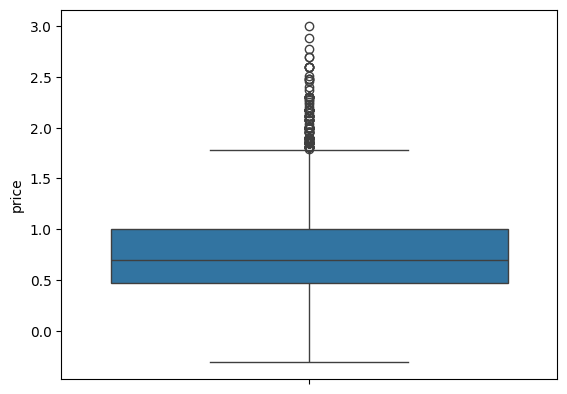

In [39]:
prueba = output_steam_games[output_steam_games['price'] > 0]
prueba['price'] = np.log10(prueba['price'])
ax = sns.boxplot(data = prueba, y = 'price')


In [40]:
# lets imput NaN in prices with the median (usd 4.99 ~ 0.698 in log10 scale)
median_price = output_steam_games['price'].median()
output_steam_games['price'] = output_steam_games['price'].fillna(median_price)
output_steam_games['price'].unique()

array([4.9900e+00, 0.0000e+00, 9.9000e-01, 2.9900e+00, 3.9900e+00,
       9.9900e+00, 1.8990e+01, 2.9990e+01, 1.0990e+01, 1.5900e+00,
       1.4990e+01, 1.9900e+00, 5.9990e+01, 8.9900e+00, 6.9900e+00,
       7.9900e+00, 3.9990e+01, 1.9990e+01, 7.4900e+00, 1.2990e+01,
       5.9900e+00, 2.4900e+00, 1.5990e+01, 1.2500e+00, 2.4990e+01,
       1.7990e+01, 6.1990e+01, 3.4900e+00, 1.1990e+01, 1.3990e+01,
       3.4990e+01, 7.4760e+01, 1.4900e+00, 3.2990e+01, 9.9990e+01,
       1.4950e+01, 6.9990e+01, 1.6990e+01, 7.9990e+01, 4.9990e+01,
       5.0000e+00, 4.4990e+01, 1.3980e+01, 2.9960e+01, 1.1999e+02,
       1.0999e+02, 1.4999e+02, 7.7171e+02, 2.1990e+01, 8.9990e+01,
       9.8000e-01, 1.3992e+02, 4.2900e+00, 6.4990e+01, 5.4990e+01,
       7.4990e+01, 8.9000e-01, 5.0000e-01, 2.9999e+02, 1.2900e+00,
       3.0000e+00, 1.5000e+01, 5.4900e+00, 2.3990e+01, 4.9000e+01,
       2.0990e+01, 1.0930e+01, 1.3900e+00, 3.6990e+01, 4.4900e+00,
       2.0000e+00, 4.0000e+00, 9.0000e+00, 2.3499e+02, 1.9500e

Now lets clean 'release_year' column

In [41]:
output_steam_games['release_year'].unique()

array(['2018', '2017', None, 'Soon..', '1997', '1998', '2016', '2006',
       'Beta测试已开启', '2005', '2003', '2007', '2002', '2000', '1995',
       '1996', '1994', '2001', '1993', '2004', '1999', '2008', '2009',
       'Jun 2009', '1992', '1989', '2010', '2011', 'Oct 2010', 'Feb 2011',
       '2013', '2012', '2014', '1983', '1984', '2015', 'Aug 2014',
       'Sep 2014', '1990', '1988', '1991', 'Apr 2015', '1985', '1982',
       '1987', 'Apr 2016', 'Jul 2016', 'June 2016', 'Coming Soon',
       'Q2 2017', 'TBA', "When it's done", 'coming soon', 'Q2 2018',
       '1981', 'Winter 2017', 'soon', 'Mar 2018', '14 July', 'Jul 2017',
       'Summer 2017', '1986', 'Spring 2018', 'Winter 2018',
       'To be Announced', 'October 2017', 'TBD', 'Fall 2017', 'Nov 2017',
       'Q1 2018', 'Dec 2017', 'Январь 2018', 'Soon',
       'First quarter of 2018', 'H2 2018', '21 Jun, 2017', '2018年初頭発売予定',
       'Please wait warmly', 'early access', 'SOON', 'Feb 2018',
       'Coming Soon/Próximamente', '2021',

In [42]:
# lets start with the easy part... every string that contain a year, replaced by that year
output_steam_games.loc[output_steam_games['release_year'].str.contains('2009', case = False, na = False), 'release_year'] = '2009'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2010', case = False, na = False), 'release_year'] = '2010'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2011', case = False, na = False), 'release_year'] = '2011'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2012', case = False, na = False), 'release_year'] = '2012'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2013', case = False, na = False), 'release_year'] = '2013'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2014', case = False, na = False), 'release_year'] = '2014'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2015', case = False, na = False), 'release_year'] = '2015'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2016', case = False, na = False), 'release_year'] = '2016'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2017', case = False, na = False), 'release_year'] = '2017'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2018', case = False, na = False), 'release_year'] = '2018'
output_steam_games.loc[output_steam_games['release_year'].str.contains('2019', case = False, na = False), 'release_year'] = '2019'

In [43]:
output_steam_games['release_year'].unique()

array(['2018', '2017', None, 'Soon..', '1997', '1998', '2016', '2006',
       'Beta测试已开启', '2005', '2003', '2007', '2002', '2000', '1995',
       '1996', '1994', '2001', '1993', '2004', '1999', '2008', '2009',
       '1992', '1989', '2010', '2011', '2013', '2012', '2014', '1983',
       '1984', '2015', '1990', '1988', '1991', '1985', '1982', '1987',
       'Coming Soon', 'TBA', "When it's done", 'coming soon', '1981',
       'soon', '14 July', '1986', 'To be Announced', 'TBD', 'Soon',
       'Please wait warmly', 'early access', 'SOON',
       'Coming Soon/Próximamente', '2021', '预热群52756441', 'Coming soon',
       '0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵',
       '"""Soon"""', 'Demo coming soon.', 'Not yet available',
       "C'est bientôt...                    (ou pas)", '2019',
       'Datachunks conflicted. Be vigiliant.', 'Demo is available now!',
       '1975', '1970', 'Play Beta in demo!', 'Coming Soon!',
       'To be announced

In [44]:
# now exploratory work, one by one, through urls
output_steam_games[output_steam_games['release_year'] == 'Beta测试已开启'].url

88354    http://store.steampowered.com/app/714020/Idle_...
Name: url, dtype: object

In [45]:
output_steam_games[output_steam_games['release_year'] == 'Coming Soon/Próximamente'].url

101381    http://store.steampowered.com/app/548280/NeonB...
Name: url, dtype: object

In [46]:
output_steam_games[output_steam_games['release_year'] == 'Demo coming soon.'].url

101992    http://store.steampowered.com/app/488430/Galax...
Name: url, dtype: object

In [47]:
output_steam_games[output_steam_games['release_year'] == '"""Soon"""'].url

101928    http://store.steampowered.com/app/737660/The_D...
Name: url, dtype: object

In [48]:
output_steam_games[output_steam_games['release_year'] == '预热群52756441'].url

101738    http://store.steampowered.com/app/710190/Puzzl...
Name: url, dtype: object

In [49]:
output_steam_games[output_steam_games['release_year'] == "C'est bientôt...                    (ou pas)"].url

102241    http://store.steampowered.com/app/711700/Super...
Name: url, dtype: object

In [50]:
output_steam_games[output_steam_games['release_year'] == 'Datachunks conflicted. Be vigiliant.'].url

102662    http://store.steampowered.com/app/633060/Orwel...
Name: url, dtype: object

In [51]:
output_steam_games[output_steam_games['release_year'] == 'Play Beta in demo!'].url

103219    http://store.steampowered.com/app/717780/Trap_...
Name: url, dtype: object

In [52]:
output_steam_games[output_steam_games['release_year'] == 'SOON™'].url

120318    http://store.steampowered.com/app/519860/DUSK/
Name: url, dtype: object

In [53]:
output_steam_games[output_steam_games['release_year'] == 'Early Access Starting Soon!'].url

105517    http://store.steampowered.com/app/510370/Drago...
Name: url, dtype: object

In [54]:
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Beta测试已开启', '2018', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Coming Soon/Próximamente', '2018', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Demo coming soon.', '2020', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('"""Soon"""', '2019', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('预热群52756441', '2018', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace("C'est bientôt...                    (ou pas)", '2019', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Datachunks conflicted. Be vigiliant.', '2018', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Play Beta in demo!', '2018', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('SOON™', '2018', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Early Access Starting Soon!', '2020', regex = False)
# 101967 --> 2019

In [55]:
output_steam_games['release_year'].unique()

array(['2018', '2017', None, 'Soon..', '1997', '1998', '2016', '2006',
       '2005', '2003', '2007', '2002', '2000', '1995', '1996', '1994',
       '2001', '1993', '2004', '1999', '2008', '2009', '1992', '1989',
       '2010', '2011', '2013', '2012', '2014', '1983', '1984', '2015',
       '1990', '1988', '1991', '1985', '1982', '1987', 'Coming Soon',
       'TBA', "When it's done", 'coming soon', '1981', 'soon', '14 July',
       '1986', 'To be Announced', 'TBD', 'Soon', 'Please wait warmly',
       'early access', 'SOON', '2021', 'Coming soon',
       '0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵',
       '2019', '2020', 'Not yet available', 'Demo is available now!',
       '1975', '1970', 'Coming Soon!', 'To be announced',
       'When it is finished', 'Release Date TBA', 'When it is ready',
       'Comming Soon', 'Early Access soon', 'To Be Announced',
       'Coming soon..', '1980', 'Soon™', "When it's done!"], dtype=object)

In [56]:
output_steam_games[output_steam_games['release_year'] == 'Soon..'].url

88320    http://store.steampowered.com/app/768570/Uncan...
Name: url, dtype: object

In [57]:
output_steam_games[output_steam_games['release_year'] == 'Coming Soon'].url

95047     http://store.steampowered.com/app/380130/Warha...
95444         http://store.steampowered.com/app/382310/Eco/
99304     http://store.steampowered.com/app/658280/Dunge...
100042    http://store.steampowered.com/app/697870/Cruz_...
100365    http://store.steampowered.com/app/438460/ARENA...
100440    http://store.steampowered.com/app/720730/Witho...
100784    http://store.steampowered.com/app/629820/Manea...
101617    http://store.steampowered.com/app/437010/Space...
101956    http://store.steampowered.com/app/719160/Akhen...
102488    http://store.steampowered.com/app/503750/SPLAS...
102697    http://store.steampowered.com/app/675480/Witch...
102734    http://store.steampowered.com/app/661450/The_L...
104323       http://store.steampowered.com/app/696280/Sole/
105107    http://store.steampowered.com/app/375390/Anath...
106271       http://store.steampowered.com/app/547860/Rend/
106727    http://store.steampowered.com/app/492822/SUGUR...
106728    http://store.steampowered.com/

In [58]:
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Soon..', '2018', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('14 July', 'CS', regex = False)
output_steam_games.loc[95047,'release_year'] = 2020
output_steam_games.loc[95444,'release_year'] = 2018
output_steam_games.loc[100042,'release_year'] = 2018
output_steam_games.loc[100365,'release_year'] = 2022
output_steam_games.loc[100440,'release_year'] = 2018
output_steam_games.loc[100784,'release_year'] = 2021
output_steam_games.loc[102488,'release_year'] = 2018
output_steam_games.loc[102697,'release_year'] = 2018
output_steam_games.loc[102734,'release_year'] = 2019
output_steam_games.loc[104323,'release_year'] = 2019
output_steam_games.loc[105107,'release_year'] = 2024
output_steam_games.loc[106271,'release_year'] = 2019
output_steam_games.loc[106727,'release_year'] = 2018
output_steam_games.loc[106728,'release_year'] = 2018
output_steam_games.loc[106731,'release_year'] = 2018
output_steam_games.loc[109725,'release_year'] = 2020
output_steam_games.loc[109802,'release_year'] = 2024
output_steam_games.loc[120253,'release_year'] = 2018
output_steam_games.loc[120262,'release_year'] = 2018
output_steam_games.loc[120397,'release_year'] = 2018

In [59]:
output_steam_games[output_steam_games['release_year'] == 'TBA'].url

95499       http://store.steampowered.com/app/504690/Woven/
97645     http://store.steampowered.com/app/618560/Attac...
100004    http://store.steampowered.com/app/606000/Die_f...
101602    http://store.steampowered.com/app/704450/Never...
101606    http://store.steampowered.com/app/737002/Never...
101607    http://store.steampowered.com/app/737001/Never...
101608    http://store.steampowered.com/app/737000/Never...
101609    http://store.steampowered.com/app/738710/Never...
101610    http://store.steampowered.com/app/744680/Never...
101625    http://store.steampowered.com/app/738711/Never...
101734    http://store.steampowered.com/app/677180/Pantr...
101739    http://store.steampowered.com/app/377300/Thund...
102576    http://store.steampowered.com/app/632470/No_Tr...
105801    http://store.steampowered.com/app/634810/CW_Ch...
107047    http://store.steampowered.com/app/603930/Battl...
112405    http://store.steampowered.com/app/366580/Fazbe...
Name: url, dtype: object

In [60]:
output_steam_games.loc[95499,'release_year'] = 2019
output_steam_games.loc[100004,'release_year'] = 2018
output_steam_games.loc[101602,'release_year'] = 2018
output_steam_games.loc[101606,'release_year'] = 2018
output_steam_games.loc[101607,'release_year'] = 2018
output_steam_games.loc[101608,'release_year'] = 2018
output_steam_games.loc[101609,'release_year'] = 2018
output_steam_games.loc[101610,'release_year'] = 2018
output_steam_games.loc[101625,'release_year'] = 2018
output_steam_games.loc[101734,'release_year'] = 2019
output_steam_games.loc[101739,'release_year'] = 2021
output_steam_games.loc[102576,'release_year'] = 2019
output_steam_games.loc[107047,'release_year'] = 2018

In [61]:
output_steam_games[output_steam_games['release_year'] == "When it's done"].url
output_steam_games[output_steam_games['release_year'] == 'When it is ready'].url
output_steam_games[output_steam_games['release_year'] == 'Please wait warmly'].url
output_steam_games[output_steam_games['release_year'] == 'Not yet available'].url
output_steam_games[output_steam_games['release_year'] == 'Demo is available now!'].url
output_steam_games[output_steam_games['release_year'] == 'Coming Soon!'].url
output_steam_games[output_steam_games['release_year'] == 'To be announced'].url


104200    http://store.steampowered.com/app/638470/Egggg...
Name: url, dtype: object

In [62]:
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace("When it's done", 'CS', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('When it is ready', 'CS', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Please wait warmly', 'CS', regex = False)
output_steam_games.loc[102159,'release_year'] = 2018
output_steam_games.loc[108051,'release_year'] = 'CS'
output_steam_games.loc[102882,'release_year'] = 'CS'
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Coming Soon!', '2018', regex = False)
output_steam_games.loc[104200,'release_year'] = 2019


In [63]:
output_steam_games['release_year'].unique()

array(['2018', '2017', None, '1997', '1998', '2016', '2006', '2005',
       '2003', '2007', '2002', '2000', '1995', '1996', '1994', '2001',
       '1993', '2004', '1999', '2008', '2009', '1992', '1989', '2010',
       '2011', '2013', '2012', '2014', '1983', '1984', '2015', '1990',
       '1988', '1991', '1985', '1982', '1987', nan, 'CS', 'coming soon',
       '1981', 'TBA', 'soon', '1986', 'Coming Soon', 'To be Announced',
       'TBD', 'Soon', 'early access', 'SOON', '2021', 'Coming soon',
       '0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵',
       '2019', '2020', '1975', '1970', 2019, 'When it is finished',
       'Release Date TBA', 'Comming Soon', 'Early Access soon',
       'To Be Announced', 'Coming soon..', '1980', 'Soon™', 'CS!'],
      dtype=object)

In [64]:
output_steam_games[output_steam_games['release_year'] == 'TBA'].url
output_steam_games[output_steam_games['release_year'] == 'soon'].url
output_steam_games[output_steam_games['release_year'] == 'To be Announced'].url
output_steam_games[output_steam_games['release_year'] == 'TBD'].url
output_steam_games[output_steam_games['release_year'] == 'Comming Soon'].url
output_steam_games[output_steam_games['release_year'] == 'Early Access soon'].url
output_steam_games[output_steam_games['release_year'] == 'Comming Soon'].url
output_steam_games[output_steam_games['release_year'] == 'Coming soon..'].url


106823    http://store.steampowered.com/app/438330/Dunge...
Name: url, dtype: object

In [65]:
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('To be Announced', 'CS', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Early Access soon', 'CS', regex = False)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Coming soon..', 'CS', regex = False)

output_steam_games.loc[100146,'release_year'] = 'None'
output_steam_games.loc[100850,'release_year'] = 'None'
output_steam_games.loc[101456,'release_year'] = '2022'
output_steam_games.loc[102122,'release_year'] = 'None'
output_steam_games.loc[112781,'release_year'] = 'coming soon'
output_steam_games.loc[120299,'release_year'] = 'None'

output_steam_games.loc[106202,'release_year'] = '2019'


In [66]:
output_steam_games['release_year'].unique()

array(['2018', '2017', None, '1997', '1998', '2016', '2006', '2005',
       '2003', '2007', '2002', '2000', '1995', '1996', '1994', '2001',
       '1993', '2004', '1999', '2008', '2009', '1992', '1989', '2010',
       '2011', '2013', '2012', '2014', '1983', '1984', '2015', '1990',
       '1988', '1991', '1985', '1982', '1987', nan, 'CS', 'coming soon',
       '1981', 'TBA', 'soon', '1986', 'Coming Soon', 'None', 'Soon',
       'early access', 'SOON', '2021', '2022', 'Coming soon',
       '0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵',
       '2019', '2020', '1975', '1970', 'When it is finished',
       'Release Date TBA', 'To Be Announced', '1980', 'Soon™', 'CS!'],
      dtype=object)

In [67]:
output_steam_games[output_steam_games['release_year'] == 'Release Date TBA'].url
output_steam_games[output_steam_games['release_year'] == 'To Be Announced'].url
output_steam_games[output_steam_games['release_year'] == 'Soon™'].url
output_steam_games[output_steam_games['release_year'] == 'When it is finished'].url
output_steam_games[output_steam_games['release_year'] == 'Coming Soon'].url




99304     http://store.steampowered.com/app/658280/Dunge...
101617    http://store.steampowered.com/app/437010/Space...
101956    http://store.steampowered.com/app/719160/Akhen...
107036    http://store.steampowered.com/app/494240/Pengame/
108513    http://store.steampowered.com/app/506940/Broke...
120235    http://store.steampowered.com/app/386470/Spark...
120310    http://store.steampowered.com/app/689820/Spy_o...
Name: url, dtype: object

In [68]:
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Soon™', 'CS', regex = False)
output_steam_games.loc[104571,'release_year'] = '2022'
output_steam_games.loc[106402,'release_year'] = '2019'
output_steam_games.loc[104204,'release_year'] = '2020'
output_steam_games.loc[120310,'release_year'] = 'None'
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Coming Soon', 'CS', regex = False)

In [69]:
output_steam_games['release_year'].unique()

array(['2018', '2017', None, '1997', '1998', '2016', '2006', '2005',
       '2003', '2007', '2002', '2000', '1995', '1996', '1994', '2001',
       '1993', '2004', '1999', '2008', '2009', '1992', '1989', '2010',
       '2011', '2013', '2012', '2014', '1983', '1984', '2015', '1990',
       '1988', '1991', '1985', '1982', '1987', nan, 'CS', 'coming soon',
       '1981', 'TBA', 'soon', '1986', 'None', 'Soon', 'early access',
       'SOON', '2021', '2022', 'Coming soon',
       '0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵',
       '2019', '2020', '1975', '1970', '1980', 'CS!'], dtype=object)

In [70]:
output_steam_games[output_steam_games['release_year'] == 'TBA'].url
output_steam_games[output_steam_games['release_year'] == 'coming soon'].url
output_steam_games[output_steam_games['release_year'] == 'early access'].url
output_steam_games[output_steam_games['release_year'] == 'Coming soon'].url


101905    http://store.steampowered.com/app/284080/Lost_...
102724    http://store.steampowered.com/app/575340/Chess...
103736    http://store.steampowered.com/app/689470/Chrom...
104033    http://store.steampowered.com/app/708360/VR_Ra...
104784    http://store.steampowered.com/app/585820/Leyli...
105097    http://store.steampowered.com/app/516030/Insan...
109990    http://store.steampowered.com/app/496570/Locus...
120293    http://store.steampowered.com/app/708150/Lost_...
Name: url, dtype: object

In [71]:
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('TBA', 'CS', regex = False)
output_steam_games.loc[96862,'release_year'] = '2018'
output_steam_games.loc[120268,'release_year'] = '2018'
output_steam_games.loc[112781,'release_year'] = 'CS'
output_steam_games.loc[101318,'release_year'] = 'CS'
output_steam_games.loc[102724,'release_year'] = '2018'
output_steam_games.loc[101905,'release_year'] = 'CS'
output_steam_games.loc[103736,'release_year'] = '2018'
output_steam_games.loc[104033,'release_year'] = 'CS'
output_steam_games.loc[104784,'release_year'] = '2019'
output_steam_games.loc[105097,'release_year'] = '2018'
output_steam_games.loc[109990,'release_year'] = 'CS'
output_steam_games.loc[120293,'release_year'] = '2018'


In [72]:
output_steam_games['release_year'].unique()

array(['2018', '2017', None, '1997', '1998', '2016', '2006', '2005',
       '2003', '2007', '2002', '2000', '1995', '1996', '1994', '2001',
       '1993', '2004', '1999', '2008', '2009', '1992', '1989', '2010',
       '2011', '2013', '2012', '2014', '1983', '1984', '2015', '1990',
       '1988', '1991', '1985', '1982', '1987', nan, 'CS', '1981', 'soon',
       '1986', 'None', 'Soon', 'SOON', '2021', '2022',
       '0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵',
       '2019', '2020', '1975', '1970', '1980', 'CS!'], dtype=object)

In [73]:
output_steam_games[output_steam_games['release_year'] == '0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵'].url
output_steam_games[output_steam_games['release_year'] == 'SOON'].url
output_steam_games[output_steam_games['release_year'] == 'Soon'].url
output_steam_games[output_steam_games['release_year'] == 'soon'].url
output_steam_games[output_steam_games['release_year'] == 'CS!'].url


114236    http://store.steampowered.com/app/349710/Shwip/
Name: url, dtype: object

In [74]:
output_steam_games.loc[101924,'release_year'] = 'None'
output_steam_games.loc[101344,'release_year'] = 'None'
output_steam_games.loc[101554,'release_year'] = 'None'
output_steam_games.loc[101556,'release_year'] = 'None'
output_steam_games.loc[103978,'release_year'] = 'None'
output_steam_games.loc[101967,'release_year'] = '2019'
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('Soon', 'None', regex = False)
output_steam_games.loc[98585,'release_year'] = 'CS'
output_steam_games.loc[114236,'release_year'] = '2021'


In [75]:
# all games that have "coming soon" (CS) release that are going to be imputed as 2024 (lets asume they're going to be released some time next year)
output_steam_games['release_year'] = output_steam_games['release_year'].str.replace('CS', '2024', regex = False)
output_steam_games['release_year'].unique()

array(['2018', '2017', None, '1997', '1998', '2016', '2006', '2005',
       '2003', '2007', '2002', '2000', '1995', '1996', '1994', '2001',
       '1993', '2004', '1999', '2008', '2009', '1992', '1989', '2010',
       '2011', '2013', '2012', '2014', '1983', '1984', '2015', '1990',
       '1988', '1991', '1985', '1982', '1987', nan, '2024', '1981',
       '1986', 'None', '2021', '2022', '2019', '2020', '1975', '1970',
       '1980'], dtype=object)

<Axes: xlabel='release_year', ylabel='Count'>

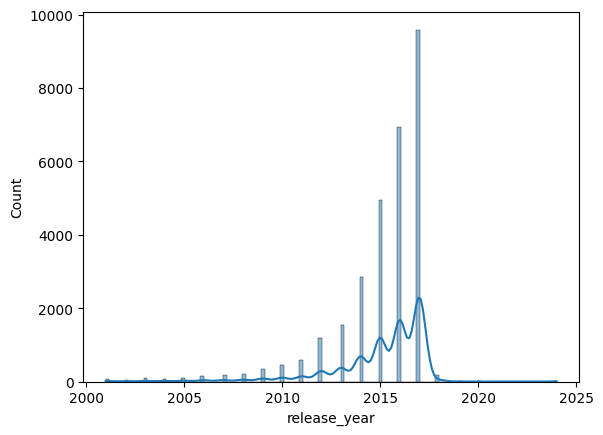

In [132]:
# a quick exploration in games with None values (through theirs steam pages) yields that they actually can have any release date (2018, 2020, Coming soon, and so on) but they're more than 2000
# so isn't feasible to them one by one. Lets impute theirs release year with a random year choosen from the distribution of 'release_date'
release_year_stat = output_steam_games[['id', 'release_year']]
release_year_stat = release_year_stat[release_year_stat['release_year'] != "None"]
release_year_stat['release_year'] = pd.to_numeric(release_year_stat['release_year'])
release_year_stat = release_year_stat[release_year_stat['release_year'] > 2000]
release_year_stat['release_year'] = (release_year_stat['release_year'])
sns.histplot(data = release_year_stat, x = 'release_year', kde = True)

In [142]:
years = release_year_stat['release_year'].value_counts(normalize = True).index
probs = release_year_stat['release_year'].value_counts(normalize = True).values
release_year_stat['release_year'].value_counts(normalize = True)

release_year
2017.0    0.324286
2016.0    0.234680
2015.0    0.167382
2014.0    0.096096
2013.0    0.052459
2012.0    0.040291
2011.0    0.019943
2010.0    0.014940
2009.0    0.011526
2008.0    0.007200
2018.0    0.005881
2007.0    0.005645
2006.0    0.005239
2005.0    0.003448
2003.0    0.002839
2004.0    0.002670
2001.0    0.002332
2002.0    0.001690
2024.0    0.000879
2019.0    0.000338
2020.0    0.000101
2021.0    0.000068
2022.0    0.000068
Name: proportion, dtype: float64

In [190]:
# imputing NaNs and None values with year values following the probability distribution
import random

# output_steam_games[output_steam_games['release_year'] == 'None']['release_year'] = None
condition = output_steam_games['release_year'] == 'None'
output_steam_games.loc[condition, 'release_year'] = None

output_steam_games['release_year'] = output_steam_games['release_year'].apply(lambda x: x if x == x else random.choices(years, weights = probs, k = 1)[0])
output_steam_games['release_year'] = output_steam_games['release_year'].apply(lambda x: x if x is not None else random.choices(years, weights = probs, k = 1)[0])

# changing column type to integer
output_steam_games['release_year'] = output_steam_games['release_year'].astype(int)

<Axes: xlabel='release_year', ylabel='Count'>

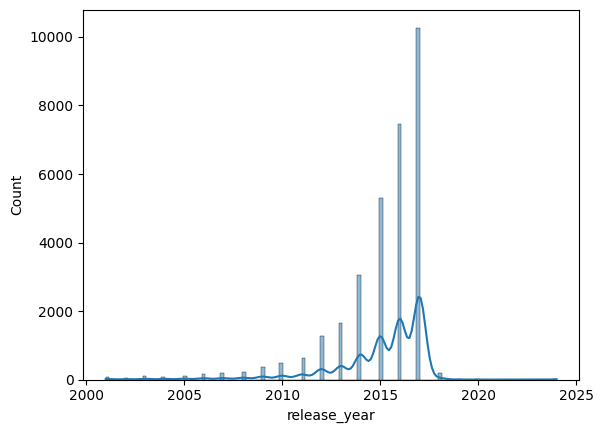

In [197]:
# checking post transformation results if they're following the original distribution

release_year_stat = output_steam_games[['id', 'release_year']]
release_year_stat = release_year_stat[release_year_stat['release_year'] != "None"]
release_year_stat['release_year'] = pd.to_numeric(release_year_stat['release_year'])
release_year_stat = release_year_stat[release_year_stat['release_year'] > 2000]
release_year_stat['release_year'] = (release_year_stat['release_year'])
sns.histplot(data = release_year_stat, x = 'release_year', kde = True)

In [201]:
# done with release_year, all rows have its own no-null value of year (int) where nulls and nans where imputed following the original release_year probability distribution
output_steam_games['release_year'].unique()

array([2018, 2017, 2016, 2013, 2012, 1997, 1998, 2007, 2006, 2014, 2009,
       2005, 2003, 2002, 2000, 1995, 1996, 1994, 2001, 1993, 2004, 1999,
       2008, 1992, 1989, 2010, 2011, 2015, 1983, 1984, 1990, 1988, 1991,
       1985, 1982, 1987, 2024, 1981, 1986, 2021, 2022, 2019, 2020, 1975,
       1970, 1980])

In [208]:
# writing files

game_price = output_steam_games[['id', 'price']]
game_info = output_steam_games[['id', 'title', 'release_year', 'developer']]

game_genres_matrix.to_csv(filepath + 'game_genres_matrix.csv', sep = '|', encoding = 'utf-8')
game_price.to_csv(filepath + 'game_price.csv', sep = '|', encoding = 'utf-8')
game_info.to_csv(filepath + 'game_info.csv', sep = '|', encoding = 'utf-8')

In [207]:
game_genres_matrix

,title,id,Action,Casual,Indie,Simulation,Strategy,Free to Play,RPG,Sports,...,Animation &amp; Modeling,Video Production,Utilities,Web Publishing,Education,Software Training,Design &amp; Illustration,Audio Production,Photo Editing,Accounting
88310,Lost Summoner Kitty,761140.0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88311,Ironbound,643980.0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
88312,Real Pool 3D - Poolians,670290.0,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
88313,弹炸人2222,767400.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88314,Log Challenge,773570.0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Colony On Mars,773640.0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120441,LOGistICAL: South Africa,733530.0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120442,Russian Roads,610660.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120443,EXIT 2 - Directions,658870.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
